In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yt
from yt.units import kpc, Msun
import matplotlib.colors as colors
%config InlineBackend.figure_format = 'retina'
import matplotlib.colors as colors

In [84]:
#IDs for M31 analogs with not major merger in the last 8 Gyr and a stellar mass cut of 5e10-2e11 applied
ids = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt')

In [85]:
id = int(ids[1])
ppx, ppy, ppz, ppvx, ppvy, ppvz, ppm, ppage, ppgz = np.loadtxt('../data/M31analog_%s_star_properties_rotated.txt'%id, usecols=(0, 1, 2, 3, 4, 5, 6, 7,8), unpack = True)

ppx = ppx[ppage > 0.]
ppy = ppy[ppage > 0.]
ppz = ppz[ppage > 0.]
ppm = ppm[ppage > 0.]
ppgz = np.abs(ppgz[ppage > 0.])
ppage = ppage[ppage > 0.]




data = {'particle_position_x': ppx/0.704,
        'particle_position_y': ppy/0.704,
        'particle_position_z': ppz/0.704,
        'particle_mass': ppm/0.704,
        'particle_age': ppage,
        'Metallicity':ppgz}

bbox = 1.5*np.array([[min(ppx), max(ppx)], [min(ppy), max(ppy)], [min(ppz), max(ppz)]])
ds = yt.load_particles(data, length_unit=kpc, mass_unit=1e10*Msun, n_ref=128, bbox=bbox)
len(ppx)
np.min(ppgz), np.max(ppgz)

yt : [INFO     ] 2018-07-31 11:05:19,741 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-31 11:05:19,742 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-07-31 11:05:19,744 Parameters: domain_left_edge          = [-470.04445454 -415.4891234  -691.36309249]
yt : [INFO     ] 2018-07-31 11:05:19,746 Parameters: domain_right_edge         = [ 562.0473846   251.8527803   378.18718533]
yt : [INFO     ] 2018-07-31 11:05:19,748 Parameters: cosmological_simulation   = 0.0


(0.0, 0.089055940508842468)

In [86]:
ds.derived_field_list

yt : [INFO     ] 2018-07-31 11:05:19,759 Allocating for 1.266e+05 particles (index particle type 'all')
yt : [INFO     ] 2018-07-31 11:05:19,792 Identified 4.401e+03 octs


[('all', 'Metallicity'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radius'),
 ('all', 'particle_spherical_position_phi'),
 ('all', 'particle_spherical_position_radius'),
 ('all', 'particle_spherical_position_theta'),
 ('deposit', 'all_cic'),
 ('deposit', 'all_count'),
 ('deposit', 'all_density'),
 ('deposit', 'all_mass'),
 ('deposit', 'io_c

yt : [INFO     ] 2018-07-31 11:05:20,111 xlim = -516.045920 516.045920
yt : [INFO     ] 2018-07-31 11:05:20,113 ylim = -333.670952 333.670952
yt : [INFO     ] 2018-07-31 11:05:20,115 xlim = -516.045920 516.045920
yt : [INFO     ] 2018-07-31 11:05:20,116 ylim = -333.670952 333.670952
yt : [INFO     ] 2018-07-31 11:05:20,119 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800
yt : [INFO     ] 2018-07-31 11:05:20,980 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



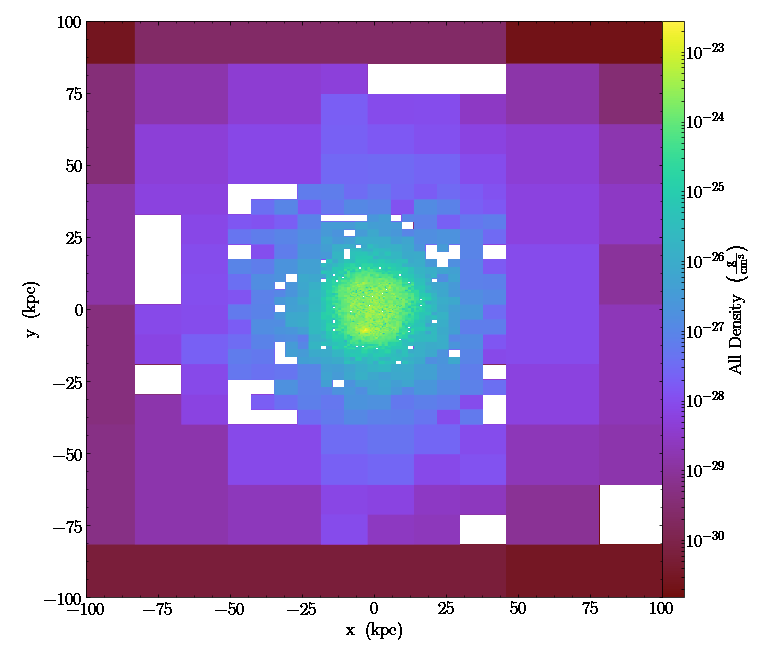

In [87]:
slc = yt.SlicePlot(ds, 2,'all_density',center=[0.,0.,0.])
slc.set_width((200, 'kpc'))

yt : [INFO     ] 2018-07-31 11:05:21,988 xlim = -100.000000 100.000000
yt : [INFO     ] 2018-07-31 11:05:21,990 ylim = -100.000000 100.000000
yt : [INFO     ] 2018-07-31 11:05:21,993 xlim = -100.000000 100.000000
yt : [INFO     ] 2018-07-31 11:05:21,994 ylim = -100.000000 100.000000
yt : [INFO     ] 2018-07-31 11:05:21,996 Splatting (('all', 'Metallicity')) onto a 800 by 800 mesh



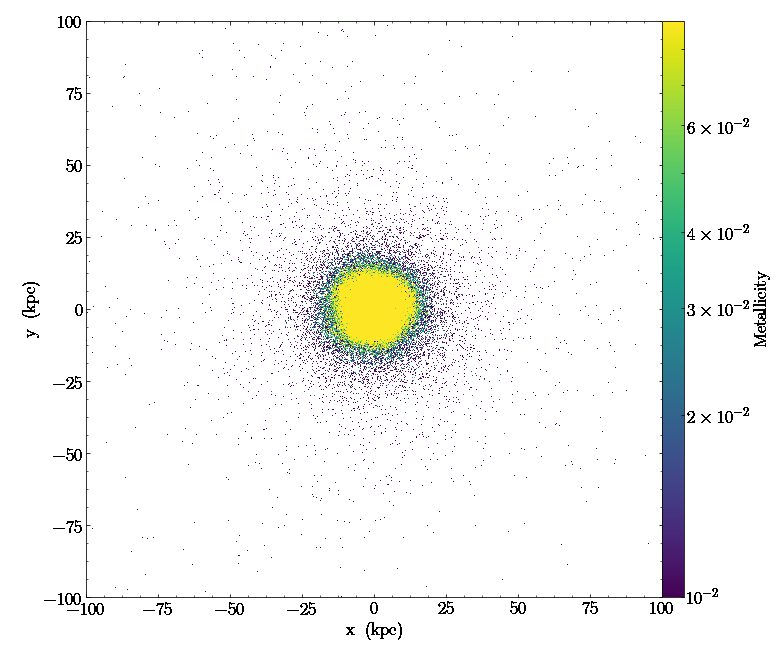

In [88]:
#prj = yt.ProjectionPlot(ds, 2, 'particle_age', width=100*kpc)
#slc = yt.SlicePlot(ds, 2,'particle_z')
#slc.set_width((200, 'kpc'))

p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'Metallicity', center=[0.,0.,0.], width=200*kpc)
p.set_cmap('Metallicity', 'viridis')
p.set_zlim('Metallicity', 1e-2, np.max(ppgz))


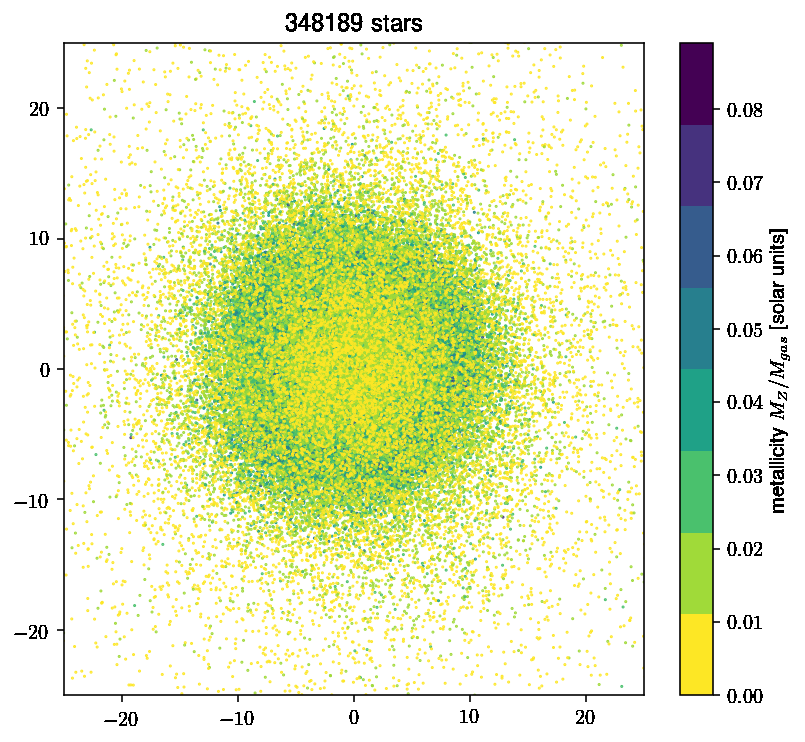

In [89]:
plt.figure(figsize=(6.5,6))
plt.scatter(ppx, ppy, c=ppgz, marker='.', s=1,vmin=0, vmax=np.max(ppgz), cmap=plt.cm.get_cmap('viridis_r', 8))#,alpha=0.5)#norm=colors.LogNorm(vmin=1e-2, vmax=np.max(ppgz)))
plt.colorbar(label=r'metallicity $M_Z/M_{gas}$ [solar units]')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.title('%s stars'%id)

In [90]:
ppx, ppy, ppz, ppvx, ppvy, ppvz, ppm, ppnh, ppsfr, ppgz = np.loadtxt('../data/M31analog_%s_gas_properties_rotated.txt'%id, usecols=(0, 1, 2, 3, 4, 5, 6, 7,8,9), unpack = True)

data = {'particle_position_x': ppx/0.704,
        'particle_position_y': ppy/0.704,
        'particle_position_z': ppz/0.704,
        'particle_mass': ppm/0.704,
        'particle_nh': ppnh,
        'Metallicity':ppgz,
        'SFR': ppsfr}
bbox = 1.5*np.array([[min(ppx), max(ppx)], [min(ppy), max(ppy)], [min(ppz), max(ppz)]])
#bbox = [[-1000.0, 1000.0], [-1000.0, 1000.0], [-1000.0, 1000.0]]
ds = yt.load_particles(data, length_unit=kpc, mass_unit=1e10*Msun, n_ref=64, bbox=bbox)
len(ppx)

yt : [INFO     ] 2018-07-31 11:05:31,187 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-31 11:05:31,188 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-07-31 11:05:31,190 Parameters: domain_left_edge          = [-556.39395718 -443.12551298 -764.2484396 ]
yt : [INFO     ] 2018-07-31 11:05:31,192 Parameters: domain_right_edge         = [ 630.09255018  274.10390959  390.68697279]
yt : [INFO     ] 2018-07-31 11:05:31,194 Parameters: cosmological_simulation   = 0.0


94771

yt : [INFO     ] 2018-07-31 11:05:31,208 Allocating for 9.477e+04 particles (index particle type 'all')
yt : [INFO     ] 2018-07-31 11:05:31,233 Identified 6.913e+03 octs
yt : [INFO     ] 2018-07-31 11:05:31,509 xlim = -593.243254 593.243254
yt : [INFO     ] 2018-07-31 11:05:31,510 ylim = -358.614711 358.614711
yt : [INFO     ] 2018-07-31 11:05:31,512 xlim = -593.243254 593.243254
yt : [INFO     ] 2018-07-31 11:05:31,513 ylim = -358.614711 358.614711
yt : [INFO     ] 2018-07-31 11:05:31,516 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800
yt : [INFO     ] 2018-07-31 11:05:32,076 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



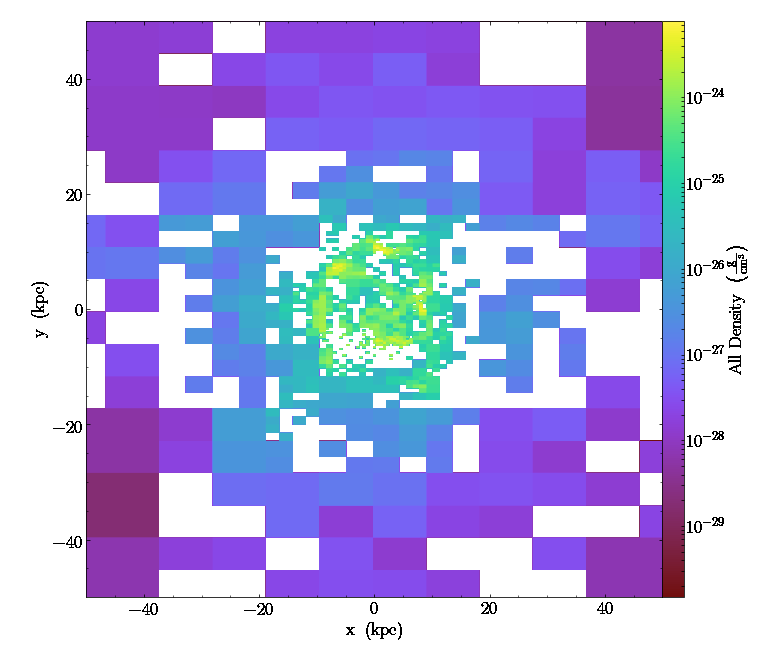

In [91]:
slc = yt.SlicePlot(ds, 2,'all_density',center=[0.,0.,0.])
slc.set_width((100, 'kpc'))

yt : [INFO     ] 2018-07-31 11:05:32,816 xlim = -50.000000 50.000000
yt : [INFO     ] 2018-07-31 11:05:32,817 ylim = -50.000000 50.000000
yt : [INFO     ] 2018-07-31 11:05:32,820 xlim = -50.000000 50.000000
yt : [INFO     ] 2018-07-31 11:05:32,821 ylim = -50.000000 50.000000
yt : [INFO     ] 2018-07-31 11:05:32,824 Splatting (('all', 'SFR')) onto a 800 by 800 mesh



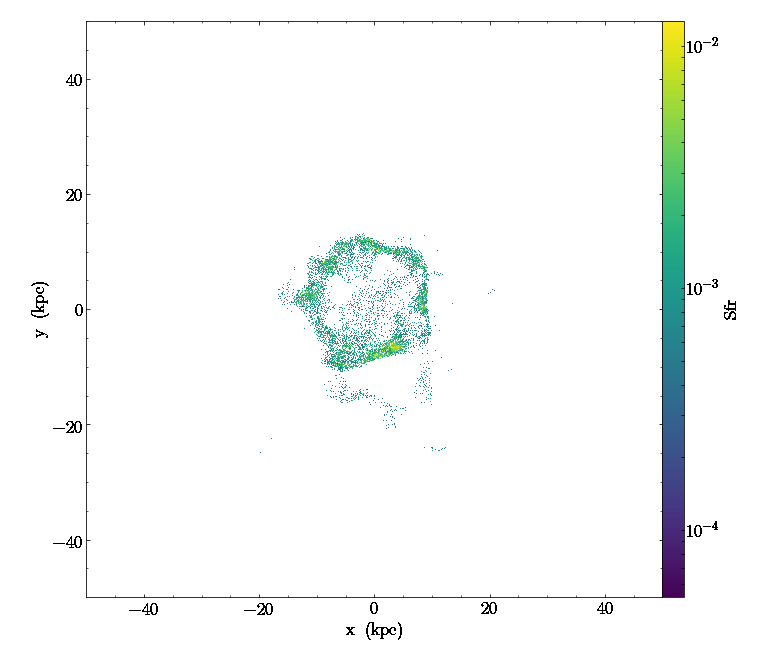

In [92]:
p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'SFR', center=[0.,0.,0.], width=100*kpc)
p.set_cmap('SFR', 'viridis')
#p.set_zlim('Metallicity', 1e-2, np.max(ppgz))

(0.0, 0.0038419540505856276)

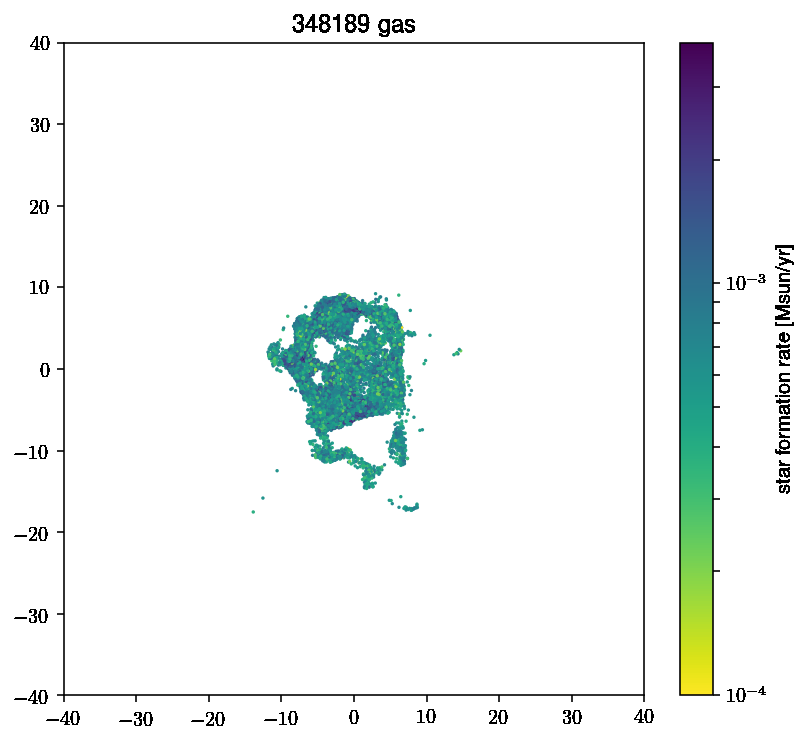

In [93]:
plt.figure(figsize=(6.5,6))
plt.scatter(ppx, ppy, c=ppsfr, marker='.', s=2,norm=colors.LogNorm(vmin=1e-4, vmax=np.max(ppsfr)), cmap='viridis_r')
plt.colorbar(label='star formation rate [Msun/yr]')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.title('%s gas'%id)
np.min(ppy), np.max(ppy)
np.min(ppsfr), np.max(ppsfr)
